In [1]:
# import the packages and library
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import timedelta
from datetime import datetime
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# google drive mount
drive.mount('/content/drive/')
os.chdir("/content/drive/MyDrive/Colab Notebooks")

Mounted at /content/drive/


In [3]:
actual_values_2019 = pd.read_csv('/content/drive/MyDrive/Data_Analytics_set_2019.csv')
plastic_industry = pd.read_csv('/content/drive/MyDrive/Sample 1_CSV_S&P1500_Raw Dataset_Data Analytics in Business Assignment_2021.csv')
plastic_industry_ESG_AZS_SGR = pd.read_csv('/content/drive/MyDrive/Dataset_ESG_AZS_SGR.csv')


In [4]:
plastic_industry = plastic_industry[plastic_industry['SIC Code'].isin([2821])]

In [5]:
plastic_industry_ESG_AZS_SGR.head()

,Name,Year,ESG,Altman's Z-Score,Sustainable Growth Rate
0,AdvanSix Inc,2016,31.9284,2.0985,9.8345
1,AdvanSix Inc,2017,44.5428,3.3259,49.5867
2,AdvanSix Inc,2018,43.3759,2.7851,16.6304
3,Albemarle Corp,2016,55.4170,2.9957,12.5900
4,Albemarle Corp,2017,55.3868,3.7982,-2.3300


In [6]:
plastic_industry.head()

,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
106,AVNT UN Equity,Avient Corp,2016,US05368V1061,2821.0,151010,US,7000.0,2735.800,50.400,NaN,NaN,225.500,35.6589,35.0877,55.3571,1.7025,6.1978,23.1227,23.0416
331,DD UN Equity,DuPont de Nemours Inc,2016,US26614N1028,2821.0,151010,US,NaN,79511.000,3061.000,3061.000,3061.000,6607.000,NaN,NaN,NaN,1.5448,4.7962,10.2106,26.6567
543,ROG UN Equity,Rogers Corp,2016,US7751331015,2821.0,452030,US,3100.0,1056.500,28.582,28.582,28.582,227.767,11.6279,24.5614,58.9286,1.7084,4.8602,7.9129,38.0131
659,EMN UN Equity,Eastman Chemical Co,2016,US2774321002,2821.0,151010,US,14000.0,15457.000,219.000,214.000,219.000,181.000,45.7364,47.3684,75.0000,1.4193,5.5031,20.1581,26.0879
767,ALB UN Equity,Albemarle Corp,2016,US0126531013,2821.0,151010,US,5000.0,8161.207,80.475,80.475,80.475,2269.756,41.0853,33.3333,57.1429,1.7218,7.2489,18.2617,36.2534


In [7]:
plastic_industry = pd.merge(plastic_industry, plastic_industry_ESG_AZS_SGR, on=['Name', 'Year'], how='inner')
plastic_industry.head()

,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,...,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin,ESG,Altman's Z-Score,Sustainable Growth Rate
0,AVNT UN Equity,Avient Corp,2016,US05368V1061,2821.0,151010,US,7000.0,2735.800,50.400,...,35.6589,35.0877,55.3571,1.7025,6.1978,23.1227,23.0416,52.4696,3.5418,17.4115
1,DD UN Equity,DuPont de Nemours Inc,2016,US26614N1028,2821.0,151010,US,NaN,79511.000,3061.000,...,NaN,NaN,NaN,1.5448,4.7962,10.2106,26.6567,NaN,3.2500,2.4100
2,ROG UN Equity,Rogers Corp,2016,US7751331015,2821.0,452030,US,3100.0,1056.500,28.582,...,11.6279,24.5614,58.9286,1.7084,4.8602,7.9129,38.0131,39.8551,5.0467,7.9100
3,EMN UN Equity,Eastman Chemical Co,2016,US2774321002,2821.0,151010,US,14000.0,15457.000,219.000,...,45.7364,47.3684,75.0000,1.4193,5.5031,20.1581,26.0879,62.1200,3.2952,13.5700
4,ALB UN Equity,Albemarle Corp,2016,US0126531013,2821.0,151010,US,5000.0,8161.207,80.475,...,41.0853,33.3333,57.1429,1.7218,7.2489,18.2617,36.2534,55.4170,2.9957,12.5900


In [8]:
column_names = plastic_industry.columns
temp_column_names = column_names.str.replace(' ','_').str.replace('&','').str.replace("'",'')
plastic_industry.columns = temp_column_names

plastic_industry = plastic_industry.rename(columns = {'ISIN_Number':'ISIN', 'SIC_Code':'SIC', 'GICS_Industry':'GICS',
       'Country_or_Territory_of_Domicile':'Country','Total_Assets':'Assets', 'RD_Expense':'RD', 'RD_Expense_Adjusted':'RD_Adjusted',
       'Operating_Expenses_RD':'Opx_RD', 'Cash_and_Cash_Equivalents':'Cash_equ','Environmental_Disclosure_Score':'EDS','Social_Disclosure_Score':'SDS',
       'Governance_Disclosure_Score':'GDS', 'Tobins_Q_Ratio':'Tobin_Q', 'Return_on_Assets':'ROA',
       'Return_on_Common_Equity':'ROCE', "Altmans_Z-Score":'AZS','Sustainable_Growth_Rate':'SGR'})

plastic_industry.columns

Index(['Ticker', 'Name', 'Year', 'ISIN', 'SIC', 'GICS', 'Country',
       'Number_of_Employees', 'Assets', 'RD', 'RD_Adjusted', 'Opx_RD',
       'Cash_equ', 'EDS', 'SDS', 'GDS', 'Tobin_Q', 'ROA', 'ROCE',
       'Gross_Margin', 'ESG', 'AZS', 'SGR'],
      dtype='object')

In [9]:
column_names = actual_values_2019.columns
temp_column_names = column_names.str.replace(' ','_').str.replace('&','').str.replace("'",'')
actual_values_2019.columns = temp_column_names
actual_values_2019 = actual_values_2019.rename(columns = {'ISIN_Number':'ISIN', 'SIC_Code':'SIC', 'GICS_Industry':'GICS', "Altmans_Z-Score":'AZS','Sustainable_Growth_Rate':'SGR'})


In [10]:
plastic_industry_list = plastic_industry['Name'].unique()
pd.DataFrame(data = plastic_industry_list, columns = ['Comapny Name'])

,Comapny Name
0,Avient Corp
1,DuPont de Nemours Inc
2,Rogers Corp
3,Eastman Chemical Co
4,Albemarle Corp
5,Hexcel Corp
6,AdvanSix Inc
7,Kraton Corp


In [11]:
plastic_industry_comp = plastic_industry[plastic_industry['Name'].isin(plastic_industry_list)]
plastic_industry_comp

,Ticker,Name,Year,ISIN,SIC,GICS,Country,Number_of_Employees,Assets,RD,...,EDS,SDS,GDS,Tobin_Q,ROA,ROCE,Gross_Margin,ESG,AZS,SGR
0,AVNT UN Equity,Avient Corp,2016,US05368V1061,2821.0,151010,US,7000.0,2735.800,50.400,...,35.6589,35.0877,55.3571,1.7025,6.1978,23.1227,23.0416,52.4696,3.5418,17.4115
1,DD UN Equity,DuPont de Nemours Inc,2016,US26614N1028,2821.0,151010,US,NaN,79511.000,3061.000,...,NaN,NaN,NaN,1.5448,4.7962,10.2106,26.6567,NaN,3.2500,2.4100
2,ROG UN Equity,Rogers Corp,2016,US7751331015,2821.0,452030,US,3100.0,1056.500,28.582,...,11.6279,24.5614,58.9286,1.7084,4.8602,7.9129,38.0131,39.8551,5.0467,7.9100
3,EMN UN Equity,Eastman Chemical Co,2016,US2774321002,2821.0,151010,US,14000.0,15457.000,219.000,...,45.7364,47.3684,75.0000,1.4193,5.5031,20.1581,26.0879,62.1200,3.2952,13.5700
4,ALB UN Equity,Albemarle Corp,2016,US0126531013,2821.0,151010,US,5000.0,8161.207,80.475,...,41.0853,33.3333,57.1429,1.7218,7.2489,18.2617,36.2534,55.4170,2.9957,12.5900
5,HXL UN Equity,Hexcel Corp,2016,US4282911084,2821.0,201010,US,6155.0,2400.600,46.900,...,20.9302,28.0702,55.3571,2.4399,10.8893,20.6063,28.1694,34.3124,4.7488,17.3100
6,ASIX UN Equity,AdvanSix Inc,2016,US00773T1016,2821.0,151010,US,1340.0,904.957,13.800,...,5.4264,14.0351,51.7857,1.5078,3.9116,9.8345,9.0330,31.9284,2.0985,9.8345
7,KRA UN Equity,Kraton Corp,2016,US50077C1062,2821.0,151010,US,1929.0,2906.645,39.491,...,37.9845,22.8070,57.1429,1.1458,5.3844,25.7153,27.4654,NaN,NaN,NaN
8,AVNT UN Equity,Avient Corp,2017,US05368V1061,2821.0,151010,US,6300.0,2705.300,52.100,...,35.6589,35.0877,55.3571,2.0796,-2.1209,-8.7213,22.2577,52.4696,4.1185,-6.3638
9,DD UN Equity,DuPont de Nemours Inc,2017,US26614N1028,2821.0,151010,US,98000.0,192164.000,657.000,...,53.4884,33.3333,64.2857,1.3405,0.8532,1.8351,18.1117,54.4211,2.6700,-72.4800


In [12]:

plastic_industry_comp.isna().sum()

Ticker                 0
Name                   0
Year                   0
ISIN                   0
SIC                    0
GICS                   0
Country                0
Number_of_Employees    1
Assets                 0
RD                     0
RD_Adjusted            1
Opx_RD                 1
Cash_equ               0
EDS                    1
SDS                    1
GDS                    1
Tobin_Q                0
ROA                    0
ROCE                   0
Gross_Margin           0
ESG                    4
AZS                    3
SGR                    2
dtype: int64

In [13]:
plastic_industry_comp = plastic_industry_comp.dropna()
plastic_industry_comp_col = plastic_industry_comp[['Name','Year','EDS','SDS','GDS','Tobin_Q','ROA','ROCE','ESG','AZS','SGR']]

In [14]:
plastic_industry_comp_set = plastic_industry_comp_col[plastic_industry_comp_col['Name'].isin(plastic_industry_list)]
plastic_industry_comp_set['Name'].unique()

array(['Rogers Corp', 'Eastman Chemical Co', 'Albemarle Corp',
       'Hexcel Corp', 'AdvanSix Inc', 'Avient Corp',
       'DuPont de Nemours Inc'], dtype=object)

In [15]:
plastic_industry_comp_set

,Name,Year,EDS,SDS,GDS,Tobin_Q,ROA,ROCE,ESG,AZS,SGR
2,Rogers Corp,2016,11.6279,24.5614,58.9286,1.7084,4.8602,7.9129,39.8551,5.0467,7.9100
3,Eastman Chemical Co,2016,45.7364,47.3684,75.0000,1.4193,5.5031,20.1581,62.1200,3.2952,13.5700
4,Albemarle Corp,2016,41.0853,33.3333,57.1429,1.7218,7.2489,18.2617,55.4170,2.9957,12.5900
5,Hexcel Corp,2016,20.9302,28.0702,55.3571,2.4399,10.8893,20.6063,34.3124,4.7488,17.3100
6,AdvanSix Inc,2016,5.4264,14.0351,51.7857,1.5078,3.9116,9.8345,31.9284,2.0985,9.8345
8,Avient Corp,2017,35.6589,35.0877,55.3571,2.0796,-2.1209,-8.7213,52.4696,4.1185,-6.3638
9,DuPont de Nemours Inc,2017,53.4884,33.3333,64.2857,1.3405,0.8532,1.8351,54.4211,2.6700,-72.4800
10,Rogers Corp,2017,13.1783,19.2982,58.9286,2.9458,7.3760,11.4748,38.9900,8.5431,11.4700
11,Eastman Chemical Co,2017,59.6899,47.3684,75.0000,1.4898,8.7996,27.8611,67.1600,3.5643,21.7600
12,Albemarle Corp,2017,36.4341,33.3333,64.2857,2.3500,0.6894,1.4686,55.3868,3.7982,-2.3300


**Selected Company AdvanSix Inc**

In [16]:
selected_company = plastic_industry_comp_set[plastic_industry_comp_set['Name'] == 'AdvanSix Inc']
selected_company

,Name,Year,EDS,SDS,GDS,Tobin_Q,ROA,ROCE,ESG,AZS,SGR
6,AdvanSix Inc,2016,5.4264,14.0351,51.7857,1.5078,3.9116,9.8345,31.9284,2.0985,9.8345
14,AdvanSix Inc,2017,17.0543,42.1053,55.3571,1.8627,15.0058,49.5867,44.5428,3.3259,49.5867
22,AdvanSix Inc,2018,20.9302,36.8421,55.3571,1.2841,6.3546,16.6304,43.3759,2.7851,16.6304


**The 2 competitor one from mid-level and one from large-level for AdvanSix Co are Rogers Co and Eastman Chemical Co**

In [17]:

competitor_set = plastic_industry_comp_set[(plastic_industry_comp_set['Name'] == 'Eastman Chemical Co') |
                                          (plastic_industry_comp_set['Name'] == 'Rogers Corp')]
competitor_set

,Name,Year,EDS,SDS,GDS,Tobin_Q,ROA,ROCE,ESG,AZS,SGR
2,Rogers Corp,2016,11.6279,24.5614,58.9286,1.7084,4.8602,7.9129,39.8551,5.0467,7.91
3,Eastman Chemical Co,2016,45.7364,47.3684,75.0000,1.4193,5.5031,20.1581,62.1200,3.2952,13.57
10,Rogers Corp,2017,13.1783,19.2982,58.9286,2.9458,7.3760,11.4748,38.9900,8.5431,11.47
11,Eastman Chemical Co,2017,59.6899,47.3684,75.0000,1.4898,8.7996,27.8611,67.1600,3.5643,21.76
18,Rogers Corp,2018,1.5504,19.2982,58.9286,1.7612,7.2906,10.8553,33.5077,5.8702,10.86
19,Eastman Chemical Co,2018,51.9380,52.6316,75.0000,1.2759,6.7513,19.2754,67.8000,3.5711,13.47


**Averaged value of the 2 competitors**

In [18]:
competitor_set_agg = competitor_set.groupby(['Year']).mean()
competitor_set_agg['Name'] = 'Competitor Set'
competitor_set_agg.reset_index(inplace = True)
competitor_set_agg = competitor_set_agg[['Name','Year','EDS','SDS','GDS','ROA','ROCE','ESG','SGR','AZS']]
competitor_set_agg

<ipython-input-18-f6851be56be0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  competitor_set_agg = competitor_set.groupby(['Year']).mean()


,Name,Year,EDS,SDS,GDS,ROA,ROCE,ESG,SGR,AZS
0,Competitor Set,2016,28.68215,35.9649,66.9643,5.18165,14.03550,50.98755,10.740,4.17095
1,Competitor Set,2017,36.43410,33.3333,66.9643,8.08780,19.66795,53.07500,16.615,6.05370
2,Competitor Set,2018,26.74420,35.9649,66.9643,7.02095,15.06535,50.65385,12.165,4.72065


In [19]:
company_set = selected_company.append(competitor_set)
company_set

<ipython-input-19-9185c09775fc>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  company_set = selected_company.append(competitor_set)


,Name,Year,EDS,SDS,GDS,Tobin_Q,ROA,ROCE,ESG,AZS,SGR
6,AdvanSix Inc,2016,5.4264,14.0351,51.7857,1.5078,3.9116,9.8345,31.9284,2.0985,9.8345
14,AdvanSix Inc,2017,17.0543,42.1053,55.3571,1.8627,15.0058,49.5867,44.5428,3.3259,49.5867
22,AdvanSix Inc,2018,20.9302,36.8421,55.3571,1.2841,6.3546,16.6304,43.3759,2.7851,16.6304
2,Rogers Corp,2016,11.6279,24.5614,58.9286,1.7084,4.8602,7.9129,39.8551,5.0467,7.9100
3,Eastman Chemical Co,2016,45.7364,47.3684,75.0000,1.4193,5.5031,20.1581,62.1200,3.2952,13.5700
10,Rogers Corp,2017,13.1783,19.2982,58.9286,2.9458,7.3760,11.4748,38.9900,8.5431,11.4700
11,Eastman Chemical Co,2017,59.6899,47.3684,75.0000,1.4898,8.7996,27.8611,67.1600,3.5643,21.7600
18,Rogers Corp,2018,1.5504,19.2982,58.9286,1.7612,7.2906,10.8553,33.5077,5.8702,10.8600
19,Eastman Chemical Co,2018,51.9380,52.6316,75.0000,1.2759,6.7513,19.2754,67.8000,3.5711,13.4700


**Correlation Matrix**

<Axes: >

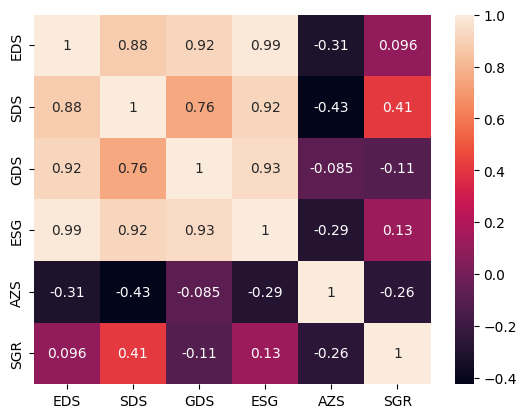

In [20]:
attribute_corr = company_set[['EDS','SDS','GDS','ESG','AZS','SGR']]
sns.heatmap(attribute_corr.corr(), annot = True)

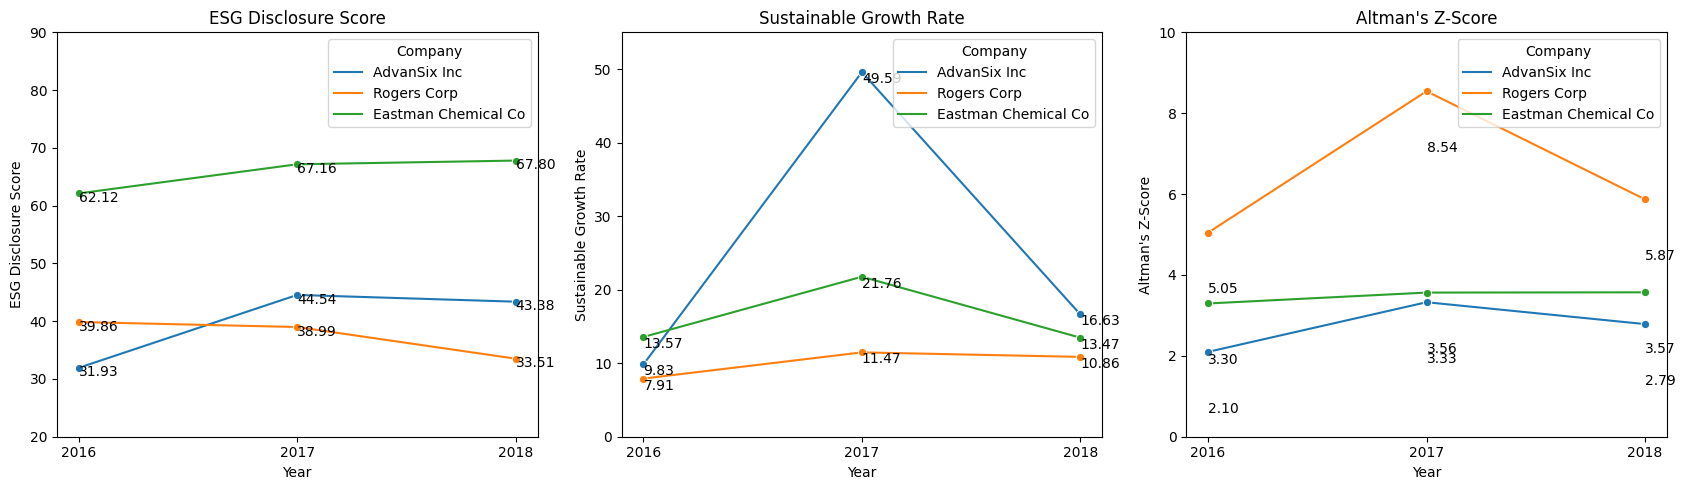

In [21]:
fig, ax = plt.subplots(1,3, figsize=(17,5))
company_set['Year'] = company_set['Year'].astype('str')
EDS = sns.lineplot(ax = ax[0], x = 'Year', y = 'ESG', hue = 'Name', data = company_set, marker = 'o')
ax[0].set_title('ESG Disclosure Score')
ax[0].set_ylabel('ESG Disclosure Score')
ax[0].set(ylim =(20,90))
for x,y in zip(company_set['Year'], company_set['ESG']):
  ax[0].text(x = x, y = y-1.5, s = '{:.2f}'.format(y))
ax[0].legend(title = 'Company',loc='upper right')

company_set['Year'] = company_set['Year'].astype('str')
EDS = sns.lineplot(ax = ax[1], x = 'Year', y = 'SGR', hue = 'Name', data = company_set, marker = 'o')
ax[1].set_title('Sustainable Growth Rate')
ax[1].set_ylabel('Sustainable Growth Rate')
ax[1].set(ylim =(0,55))
for x,y in zip(company_set['Year'], company_set['SGR']):
  ax[1].text(x = x, y = y-1.5, s = '{:.2f}'.format(y))
ax[1].legend(title = 'Company',loc='upper right')

company_set['Year'] = company_set['Year'].astype('str')
EDS = sns.lineplot(ax = ax[2], x = 'Year', y = 'AZS', hue = 'Name', data = company_set, marker = 'o')
ax[2].set_title("Altman's Z-Score")
ax[2].set_ylabel("Altman's Z-Score")
ax[2].set(ylim =(0,10))
for x,y in zip(company_set['Year'], company_set['AZS']):
  ax[2].text(x = x, y = y-1.5, s = '{:.2f}'.format(y))
ax[2].legend(title = 'Company',loc='upper right')

fig.tight_layout()


In [22]:
company_set_agg = selected_company.append(competitor_set_agg)
company_set_agg

<ipython-input-22-e4dbec323f3a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  company_set_agg = selected_company.append(competitor_set_agg)


,Name,Year,EDS,SDS,GDS,Tobin_Q,ROA,ROCE,ESG,AZS,SGR
6,AdvanSix Inc,2016,5.42640,14.0351,51.7857,1.5078,3.91160,9.83450,31.92840,2.09850,9.8345
14,AdvanSix Inc,2017,17.05430,42.1053,55.3571,1.8627,15.00580,49.58670,44.54280,3.32590,49.5867
22,AdvanSix Inc,2018,20.93020,36.8421,55.3571,1.2841,6.35460,16.63040,43.37590,2.78510,16.6304
0,Competitor Set,2016,28.68215,35.9649,66.9643,NaN,5.18165,14.03550,50.98755,4.17095,10.7400
1,Competitor Set,2017,36.43410,33.3333,66.9643,NaN,8.08780,19.66795,53.07500,6.05370,16.6150
2,Competitor Set,2018,26.74420,35.9649,66.9643,NaN,7.02095,15.06535,50.65385,4.72065,12.1650


In [23]:
regplot_advanSix =  company_set[(company_set['Name'] == 'AdvanSix Inc')]
regplot_comp =  competitor_set_agg[(competitor_set_agg['Name'] != 'AdvanSix Inc')]


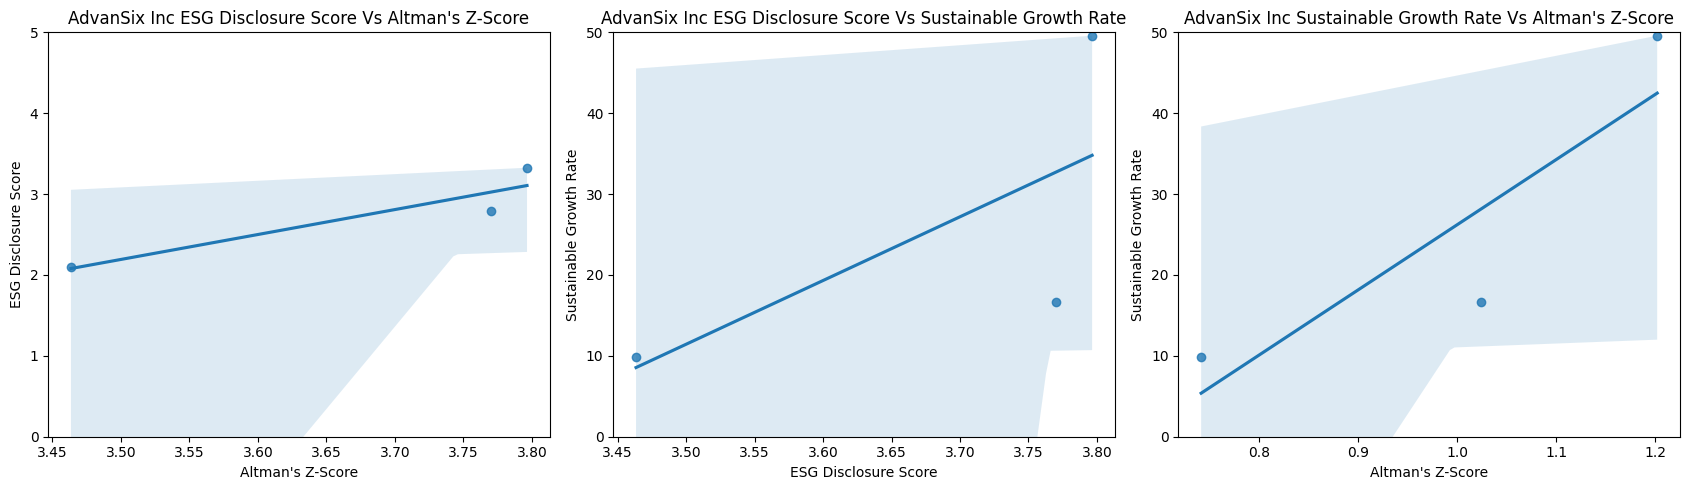

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(17,5))

ESG_AZS = sns.regplot(x = np.log(regplot_advanSix['ESG']), y = regplot_advanSix['AZS'] ,ax=ax[0])
ax[0].set(ylim =(0,5))
ax[0].set_title("AdvanSix Inc ESG Disclosure Score Vs Altman's Z-Score")
ax[0].set_xlabel("Altman's Z-Score")
ax[0].set_ylabel('ESG Disclosure Score')


ESG_SGR = sns.regplot(x = np.log(regplot_advanSix['ESG']), y = regplot_advanSix['SGR'], ax = ax[1])
ax[1].set(ylim =(0,50))
ax[1].set_title("AdvanSix Inc ESG Disclosure Score Vs Sustainable Growth Rate")
ax[1].set_xlabel("ESG Disclosure Score")
ax[1].set_ylabel('Sustainable Growth Rate')

SGR_AZS = sns.regplot(x = np.log(regplot_advanSix['AZS']), y = regplot_advanSix['SGR'], ax=ax[2])
ax[2].set(ylim =(0,50))
ax[2].set_title("AdvanSix Inc Sustainable Growth Rate Vs Altman's Z-Score")
ax[2].set_xlabel("Altman's Z-Score")
ax[2].set_ylabel("Sustainable Growth Rate")

fig.tight_layout()

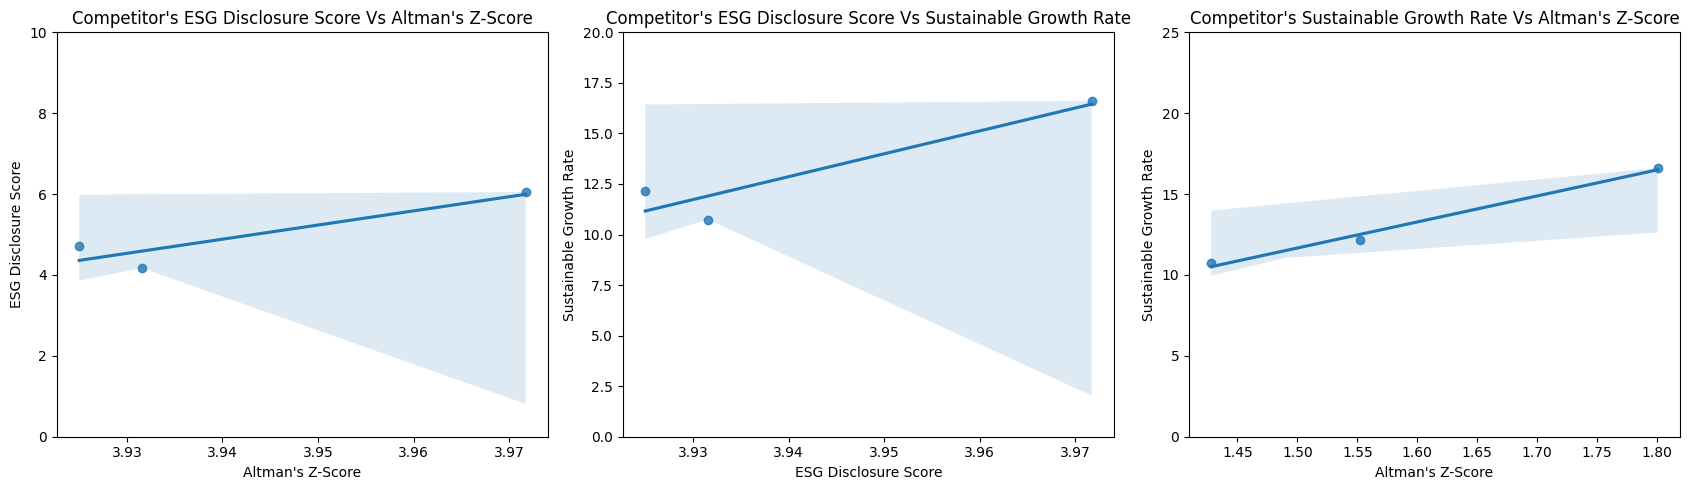

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(17,5))

ESG_AZS_comp = sns.regplot(x = np.log(regplot_comp['ESG']), y = regplot_comp['AZS'] ,ax=ax[0])
ax[0].set(ylim =(0,10))
ax[0].set_title("Competitor's ESG Disclosure Score Vs Altman's Z-Score")
ax[0].set_xlabel("Altman's Z-Score")
ax[0].set_ylabel('ESG Disclosure Score')


ESG_SGR_comp = sns.regplot(x = np.log(regplot_comp['ESG']), y = regplot_comp['SGR'], ax = ax[1])
ax[1].set(ylim =(0,20))
ax[1].set_title("Competitor's ESG Disclosure Score Vs Sustainable Growth Rate")
ax[1].set_xlabel("ESG Disclosure Score")
ax[1].set_ylabel('Sustainable Growth Rate')

SGR_AZS_comp = sns.regplot(x = np.log(regplot_comp['AZS']), y = regplot_comp['SGR'], ax=ax[2])
ax[2].set(ylim =(0,25))
ax[2].set_title("Competitor's Sustainable Growth Rate Vs Altman's Z-Score")
ax[2].set_xlabel("Altman's Z-Score")
ax[2].set_ylabel("Sustainable Growth Rate")


fig.tight_layout()

**Predictive Analysis**

In [26]:
X = attribute_corr[['ESG','SGR']]
X = sm.add_constant(X)

In [27]:
vari_infla_factor = pd.DataFrame()
vari_infla_factor['feature'] = X.columns[1:]
vari_infla_factor['VIF'] = [variance_inflation_factor(X.values, i) for i in range(1, len(X.columns))]
print(vari_infla_factor)

  feature       VIF
0     ESG  1.017545
1     SGR  1.017545


In [28]:
X = attribute_corr[['ESG','SGR']]
y = attribute_corr[['AZS']]

X = sm.add_constant(X)
AZS = sm.OLS(y,X)
model_AZS = AZS.fit()
print(model_AZS.summary())

                            OLS Regression Results                            
Dep. Variable:                    AZS   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                 -0.156
Method:                 Least Squares   F-statistic:                    0.4597
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.652
Time:                        12:31:14   Log-Likelihood:                -17.717
No. Observations:                   9   AIC:                             41.43
Df Residuals:                       6   BIC:                             42.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5440      2.710      2.415      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Analysing if the change in the predicted ESG value for year 2019 impacts positively or negatively on the AZS.**

**Calculating the ESG value for the selected company 'AdvanSix Inc'**

In [29]:
selected_company

,Name,Year,EDS,SDS,GDS,Tobin_Q,ROA,ROCE,ESG,AZS,SGR
6,AdvanSix Inc,2016,5.4264,14.0351,51.7857,1.5078,3.9116,9.8345,31.9284,2.0985,9.8345
14,AdvanSix Inc,2017,17.0543,42.1053,55.3571,1.8627,15.0058,49.5867,44.5428,3.3259,49.5867
22,AdvanSix Inc,2018,20.9302,36.8421,55.3571,1.2841,6.3546,16.6304,43.3759,2.7851,16.6304


**Using the Compound Annual Growth Rate Formula.**


In [30]:
df = pd.DataFrame(selected_company)
df_reset = df.reset_index(drop=True)

cagr_ESG = ((df_reset.loc[[2], 'ESG'].values[0])/(df_reset.loc[[0], 'ESG'].values[0]))**(1/2) - 1
cagr_SGR = ((df_reset.loc[[2], 'SGR'].values[0])/(df_reset.loc[[0], 'SGR'].values[0]))**(1/2) - 1
cagr_ESG, cagr_SGR

(0.1655627827980528, 0.3003947432924874)

**Calculated ESG and SGR value**

In [31]:
selected_company_2019 = pd.DataFrame(columns=['Name','Year','ESG','SGR'])
selected_company_2019['Name'] = ['AdvanSix Inc']
selected_company_2019['Year'] = [2019]
selected_company_2019['ESG'] = [(df_reset.loc[[2], 'ESG'].values[0]) * (1+cagr_ESG)]
selected_company_2019['SGR'] = [(df_reset.loc[[2], 'SGR'].values[0]) * (1+cagr_SGR)]
selected_company_2019

,Name,Year,ESG,SGR
0,AdvanSix Inc,2019,50.557335,21.626085


**Predicted Value of AZS**

In [32]:
X_predict = pd.DataFrame()
X_predict['const'] = [1]
X_predict['ESG'] = selected_company_2019['ESG']
X_predict['SGR'] = selected_company_2019['SGR']
selected_company_2019['AZS'] = model_AZS.predict(X_predict)

selected_company_2019

,Name,Year,ESG,SGR,AZS
0,AdvanSix Inc,2019,50.557335,21.626085,3.977336


In [33]:
filtered_values = actual_values_2019[actual_values_2019['Name'] == 'AdvanSix Inc']
actual_values_19 = filtered_values.loc[:, ['ESG','SGR','AZS']]
actual_values_19

,ESG,SGR,AZS
0,46.5044,10.0697,1.8869


<ipython-input-34-1e0aaffb2208>:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (group_name, group_data) in enumerate(df.drop('Category', axis=1).iteritems()):


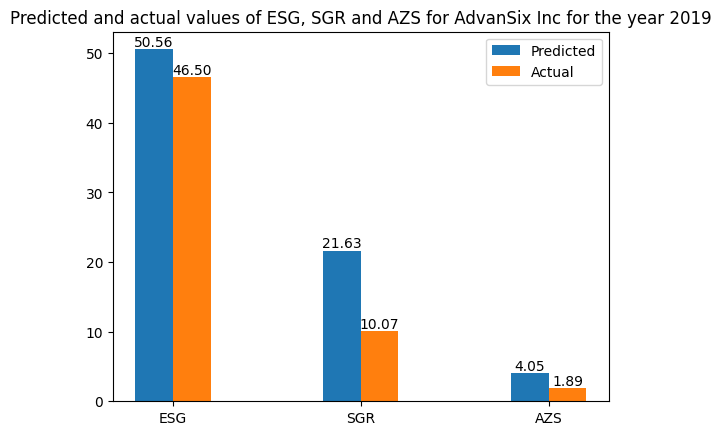

In [34]:
data = {'Category': ['ESG', 'SGR', 'AZS'],
        'Predicted': [50.557, 21.626, 4.053],
        'Actual': [46.504, 10.069, 1.8869]
        }
df = pd.DataFrame(data)
fig, ax = plt.subplots()
num_groups = len(df.columns) - 1

bar_width = 0.2

positions = np.arange(len(df['Category']))

for i, (group_name, group_data) in enumerate(df.drop('Category', axis=1).iteritems()):
    bars = ax.bar(positions + i * bar_width, group_data, bar_width, label=group_name)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

ax.set_xticks(positions + (num_groups - 1) * bar_width / 2)
ax.set_xticklabels(df['Category'])

ax.legend()
plt.title('Predicted and actual values of ESG, SGR and AZS for AdvanSix Inc for the year 2019')

plt.show()

In [35]:
filtered_values = actual_values_2019[actual_values_2019['Name'] == 'Rogers Corp'] #Eastman Chemical Co
comp_values_19 = filtered_values.loc[:, ['ESG','SGR','AZS']]
comp_values_19

,ESG,SGR,AZS
6,33.5077,5.31,7.4476


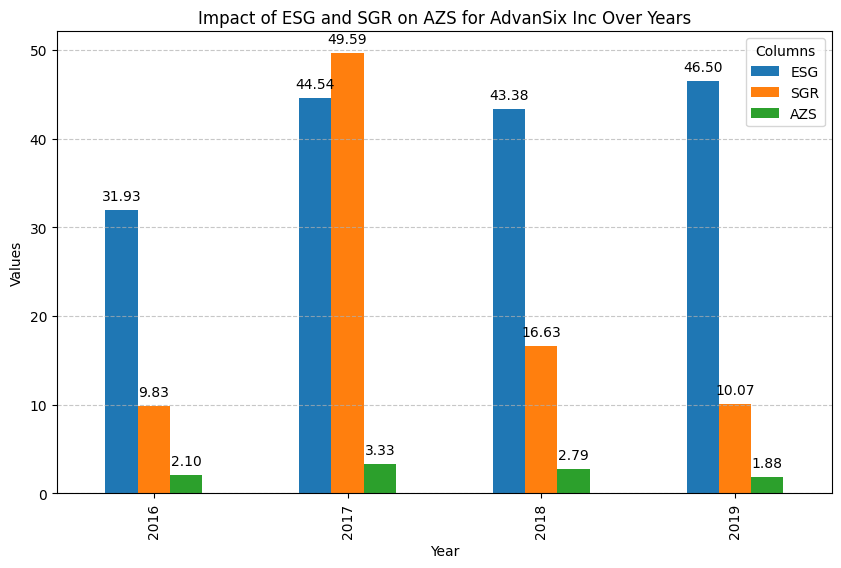

In [36]:
data = {
    'Year': [2016, 2017, 2018, 2019],
    'ESG': [31.928, 44.542, 43.375, 46.504],
    'SGR': [9.834, 49.586, 16.630, 10.069],
    'AZS': [2.098, 3.325, 2.785, 1.88],
}

df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

ax = df.plot(kind='bar', figsize=(10, 6))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Impact of ESG and SGR on AZS for AdvanSix Inc Over Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Columns')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Similar Trend can be seen in the competitor set Eastman Chemical Co**


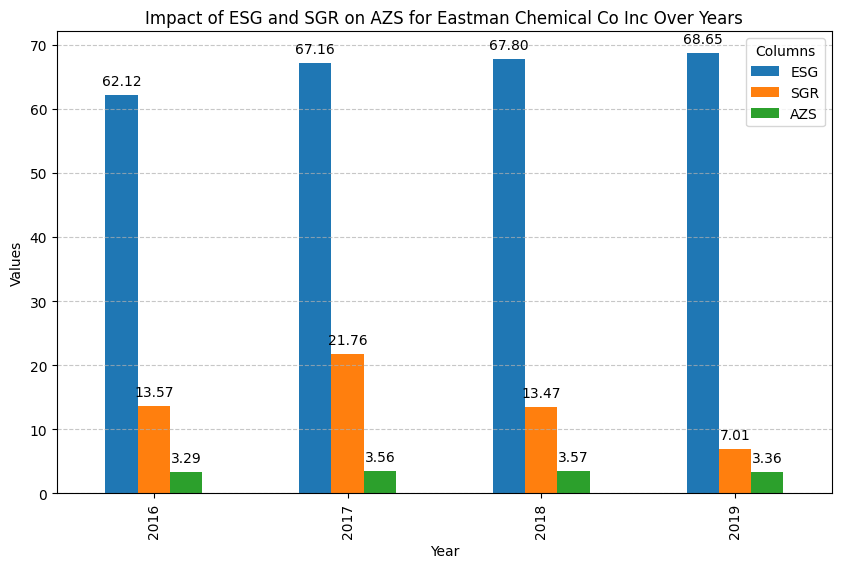

In [37]:
data = {
    'Year': [2016, 2017, 2018, 2019],
    'ESG': [62.12, 67.16, 67.8, 68.65],
    'SGR': [13.57, 21.76, 13.47, 7.01],
    'AZS': [3.295, 3.564, 3.571, 3.361],
}

df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

ax = df.plot(kind='bar', figsize=(10, 6))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Impact of ESG and SGR on AZS for Eastman Chemical Co Inc Over Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Columns')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Similar Trend can be seen in the competitor Rogers Corp**

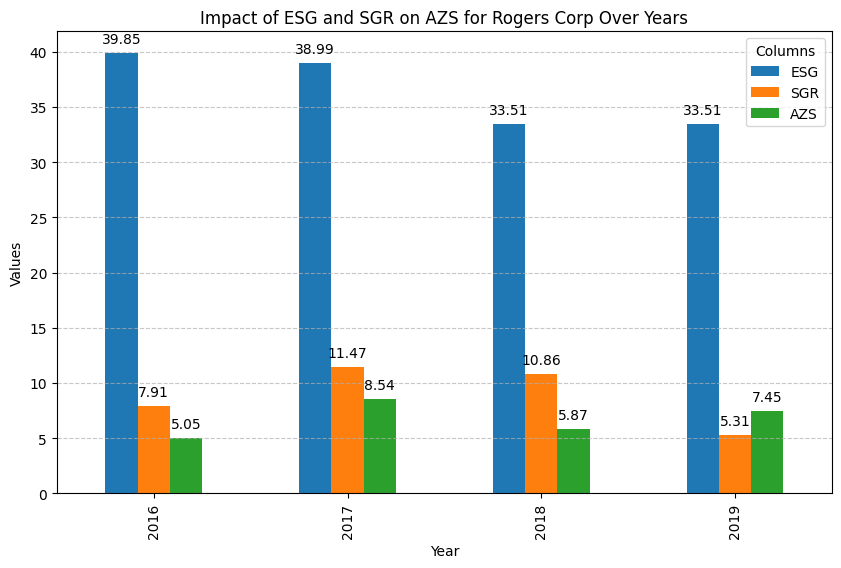

In [38]:
data = {
    'Year': [2016, 2017, 2018, 2019],
    'ESG': [39.855, 38.99, 33.507, 33.507],
    'SGR': [7.91, 11.47, 10.86, 5.31],
    'AZS': [5.046, 8.543, 5.870, 7.447],
}

df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

ax = df.plot(kind='bar', figsize=(10, 6))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Impact of ESG and SGR on AZS for Rogers Corp Over Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Columns')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [39]:
import yfinance as yf
import datetime

ASIX = 'ASIX UN Equity'
EMN = 'EMN UN Equity'
ROG = 'ROG UN Equity'
ASIX_values = []
EMN_values = []
ROG_values = []
yearly_dates = {'2016': ('2016-01-01', '2016-12-31'),
                '2017': ('2017-01-01', '2017-12-31'),
                '2018': ('2018-01-01', '2018-12-31'),
                '2019': ('2019-01-01', '2019-12-31')}

average_stock_values = []

for year, (start_date, end_date) in yearly_dates.items():
    data = yf.download(ASIX, start=start_date, end=end_date)
    average_stock_value = data['Close'].mean()
    if (average_stock_value.any()):
        average_stock_values.append(average_stock_value)
    ASIX_values.append(average_stock_value.iloc[0])

for year, (start_date, end_date) in yearly_dates.items():
    data = yf.download(EMN, start=start_date, end=end_date)
    average_stock_value = data['Close'].mean()
    if (average_stock_value.any()):
        average_stock_values.append(average_stock_value)
    EMN_values.append(average_stock_value.iloc[0])

for year, (start_date, end_date) in yearly_dates.items():
    data = yf.download(ROG, start=start_date, end=end_date)
    average_stock_value = data['Close'].mean()
    if (average_stock_value.any()):
        average_stock_values.append(average_stock_value)
    ROG_values.append(average_stock_value.iloc[1])


[*********************100%%**********************]  3 of 3 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['EQUITY', 'UN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  3 of 3 completed

ERROR:yfinance:
2 Failed downloads:


ERROR:yfinance:['EQUITY', 'UN']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  3 of 3 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['EQUITY', 'UN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  3 of 3 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['EQUITY', 'UN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  3 of 3 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['UN', 'EQUITY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  3 of 3 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['UN', 'EQUITY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  3 of 3 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['UN', 'EQUITY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  3 of 3 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['UN', 'EQUITY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  3 of 3 completed

ERROR:yfinance:
2 Failed downloads:


ERROR:yfinance:['EQUITY', 'UN']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  3 of 3 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['EQUITY', 'UN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  3 of 3 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['EQUITY', 'UN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  3 of 3 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['EQUITY', 'UN']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [40]:
print(ASIX_values)
print(EMN_values)
print(ROG_values)

[18.026666692097983, 32.806972123712185, 35.160199974060056, 26.12948207171315]
[69.61793637654138, 83.82753005920654, 96.47844003295899, 75.97107573429427]
[60.17273815094479, 113.21011969577744, 129.98275997924804, 145.25330699297535]


In [41]:
selected_company_ASIX = selected_company[['Name','Year','AZS']]
actual_values_2019_ASIX_all = actual_values_2019[actual_values_2019['Name'] == 'AdvanSix Inc']
actual_values_2019_ASIX = actual_values_2019_ASIX_all[['Name','Year','AZS']]
actual_values_2019_ASIX = selected_company_ASIX.append(actual_values_2019_ASIX)
actual_values_2019_ASIX['Stock_price'] = ASIX_values

#Eastman Chemical Co
competitor_set_EMN = competitor_set[(competitor_set['Name'] == 'Eastman Chemical Co')]
competitor_set_EMN = competitor_set_EMN[['Name','Year','AZS']]
actual_values_2019_EMN_all = actual_values_2019[actual_values_2019['Name'] == 'Eastman Chemical Co']
actual_values_2019_EMN = actual_values_2019_EMN_all[['Name','Year','AZS']]
actual_values_2019_EMN = competitor_set_EMN.append(actual_values_2019_EMN)
actual_values_2019_EMN['Stock_price'] = EMN_values

#
competitor_set_ROG = competitor_set[(competitor_set['Name'] == 'Rogers Corp')]
competitor_set_ROG = competitor_set_ROG[['Name','Year','AZS']]
actual_values_2019_ROG_all = actual_values_2019[actual_values_2019['Name'] == 'Rogers Corp']
actual_values_2019_ROG = actual_values_2019_ROG_all[['Name','Year','AZS']]
actual_values_2019_ROG = competitor_set_ROG.append(actual_values_2019_ROG)
actual_values_2019_ROG['Stock_price'] = ROG_values

<ipython-input-41-41771100e3f4>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actual_values_2019_ASIX = selected_company_ASIX.append(actual_values_2019_ASIX)
<ipython-input-41-41771100e3f4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actual_values_2019_EMN = competitor_set_EMN.append(actual_values_2019_EMN)
<ipython-input-41-41771100e3f4>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actual_values_2019_ROG = competitor_set_ROG.append(actual_values_2019_ROG)


In [42]:
actual_values_2019_ASIX

,Name,Year,AZS,Stock_price
6,AdvanSix Inc,2016,2.0985,18.026667
14,AdvanSix Inc,2017,3.3259,32.806972
22,AdvanSix Inc,2018,2.7851,35.160200
0,AdvanSix Inc,2019,1.8869,26.129482


<ipython-input-43-4efc6b58394f>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (group_name, group_data) in enumerate(actual_values_2019_ASIX.drop(['Year','Name'], axis=1).iteritems()):


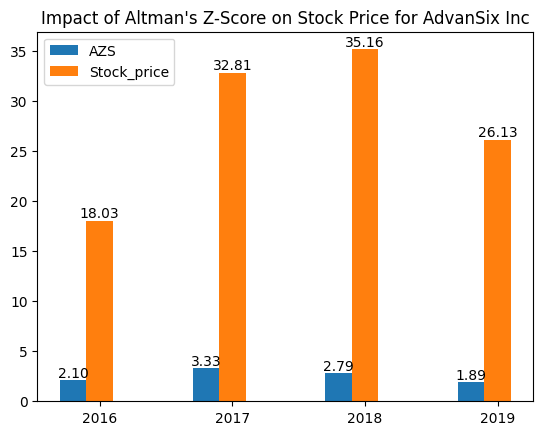

In [43]:
fig, ax = plt.subplots()

num_groups = len(actual_values_2019_ASIX.columns) - 1
bar_width = 0.2

positions = np.arange(len(actual_values_2019_ASIX['Year']))

for i, (group_name, group_data) in enumerate(actual_values_2019_ASIX.drop(['Year','Name'], axis=1).iteritems()):
    bars = ax.bar(positions + i * bar_width, group_data, bar_width, label=group_name)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

ax.set_xticks(positions + (num_groups - 1) * bar_width / 2)
ax.set_xticklabels(actual_values_2019_ASIX['Year'])

ax.legend(loc='upper left')
plt.title("Impact of Altman's Z-Score on Stock Price for AdvanSix Inc")

plt.show()


<ipython-input-44-f22e299931cc>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (group_name, group_data) in enumerate(actual_values_2019_EMN.drop(['Year','Name'], axis=1).iteritems()):


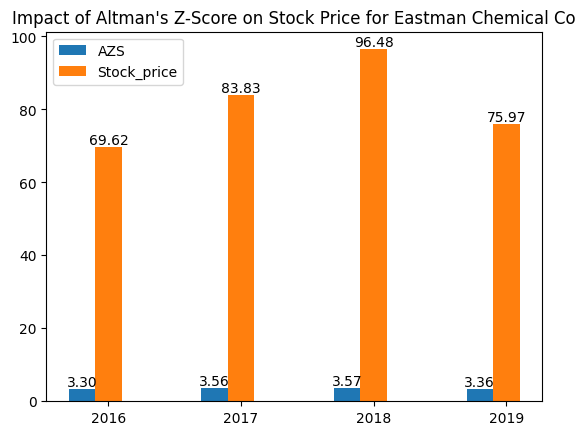

In [44]:
fig, ax = plt.subplots()

num_groups = len(actual_values_2019_EMN.columns) - 1
bar_width = 0.2

positions = np.arange(len(actual_values_2019_EMN['Year']))

for i, (group_name, group_data) in enumerate(actual_values_2019_EMN.drop(['Year','Name'], axis=1).iteritems()):
    bars = ax.bar(positions + i * bar_width, group_data, bar_width, label=group_name)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

ax.set_xticks(positions + (num_groups - 1) * bar_width / 2)
ax.set_xticklabels(actual_values_2019_EMN['Year'])

ax.legend(loc='upper left')
plt.title("Impact of Altman's Z-Score on Stock Price for Eastman Chemical Co")

plt.show()


<ipython-input-45-bcc9b901fe2b>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (group_name, group_data) in enumerate(actual_values_2019_ROG.drop(['Year','Name'], axis=1).iteritems()):


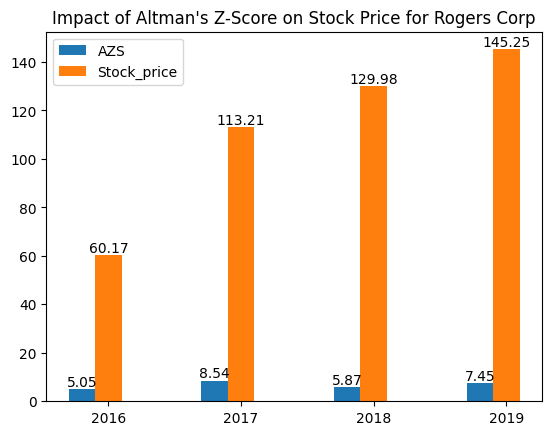

In [45]:
fig, ax = plt.subplots()

num_groups = len(actual_values_2019_ROG.columns) - 1

bar_width = 0.2

positions = np.arange(len(actual_values_2019_ROG['Year']))

for i, (group_name, group_data) in enumerate(actual_values_2019_ROG.drop(['Year','Name'], axis=1).iteritems()):
    bars = ax.bar(positions + i * bar_width, group_data, bar_width, label=group_name)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

ax.set_xticks(positions + (num_groups - 1) * bar_width / 2)
ax.set_xticklabels(actual_values_2019_ROG['Year'])


ax.legend(loc='upper left')
plt.title("Impact of Altman's Z-Score on Stock Price for Rogers Corp")

plt.show()


In [46]:
selected_company_2019

,Name,Year,ESG,SGR,AZS
0,AdvanSix Inc,2019,50.557335,21.626085,3.977336


In [47]:
train_data = actual_values_2019_ASIX[actual_values_2019_ASIX['Year'] != 2019]

X = train_data[['AZS']]
X = sm.add_constant(X)

X = train_data[['AZS']]
y = train_data[['Stock_price']]

X = sm.add_constant(X)
stock_price = sm.OLS(y,X)
model_stock_price = stock_price.fit()
print(model_stock_price.summary())


X_predict = pd.DataFrame()
X_predict['const'] = [1]
X_predict['AZS'] = selected_company_2019['AZS']
selected_company_2019['Stock_price'] = model_stock_price.predict(X_predict)
selected_company_2019

                            OLS Regression Results                            
Dep. Variable:            Stock_price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     2.308
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.371
Time:                        12:31:40   Log-Likelihood:                -8.5402
No. Observations:                   3   AIC:                             21.08
Df Residuals:                       1   BIC:                             19.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8462     23.096     -0.253      0.8

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


,Name,Year,ESG,SGR,AZS,Stock_price
0,AdvanSix Inc,2019,50.557335,21.626085,3.977336,44.313153


<ipython-input-48-e62e9eeb2f16>:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (group_name, group_data) in enumerate(df.drop('Category', axis=1).iteritems()):


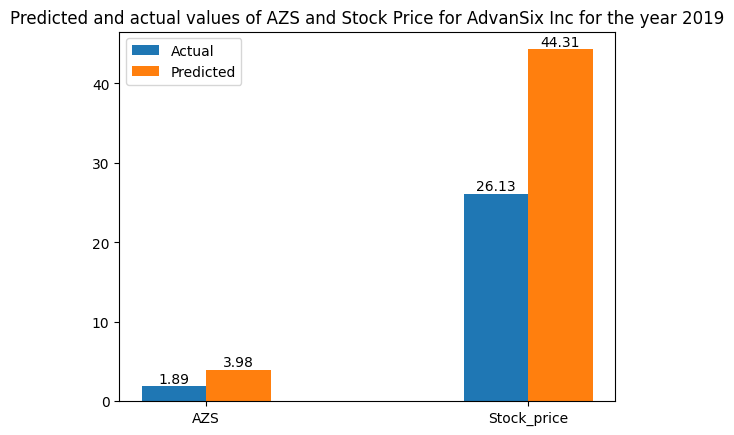

In [48]:
data = {'Category': ['AZS', 'Stock_price'],
        'Actual': [1.886, 26.13],
        'Predicted': [3.9773, 44.3131]
        }
df = pd.DataFrame(data)

fig, ax = plt.subplots()
num_groups = len(df.columns) - 1

bar_width = 0.2

positions = np.arange(len(df['Category']))

for i, (group_name, group_data) in enumerate(df.drop('Category', axis=1).iteritems()):
    bars = ax.bar(positions + i * bar_width, group_data, bar_width, label=group_name)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

ax.set_xticks(positions + (num_groups - 1) * bar_width / 2)
ax.set_xticklabels(df['Category'])

ax.legend()
plt.title('Predicted and actual values of AZS and Stock Price for AdvanSix Inc for the year 2019')

plt.show()